***MNIST***

In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [3]:
import torchvision.datasets

MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

0it [00:00, ?it/s]

9920512it [00:03, 3301427.71it/s]                            


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 46685.90it/s]                           
0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:02, 823040.05it/s]                             
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 18741.88it/s]            

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [5]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000]))

In [7]:
X_train[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [0]:
X_train = X_train.float()
X_test = X_test.float()

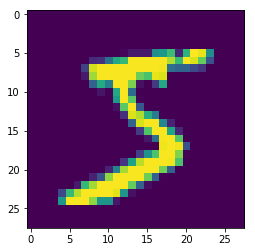

tensor(5)


In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [0]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [11]:
X_train.shape

torch.Size([60000, 784])

In [12]:
torch.cuda.is_available()

True

In [0]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n):
        super(MNISTNet, self).__init__()
        
        self.test_accuracy_history = []
        self.test_loss_history = []
        
        self.fc1 = torch.nn.Linear(28 * 28, n)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
    def fit(self, X_train, y_train, X_test=None, y_test=None):
        loss = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1.0e-3)
        
        batch_size = 100

        X_test = X_test.to(device)
        y_test = y_test.to(device)

        for epoch in range(10000):
            order = np.random.permutation(X_train.shape[0])

            for start_index in range(0, X_train.shape[0], batch_size):
                optimizer.zero_grad()

                batch_indexes = order[start_index : start_index + batch_size]

                X_batch = X_train[batch_indexes].to(device)
                y_batch = y_train[batch_indexes].to(device)

                preds = net.forward(X_batch)

                loss_value = loss(preds, y_batch)
                loss_value.backward()

                optimizer.step()
                
            if (X_test is not None) and (y_test is not None):
                self.test_loss_history.append(loss(self.forward(X_test), y_test).item())

                test_accuracy = (self.forward(X_test).argmax(dim=1) == y_test).float().mean()
                self.test_accuracy_history.append(test_accuracy.item())

                print(test_accuracy.item())
        
        return self

In [0]:
net = MNISTNet(100)

Занята ли карта вычислениями?

In [35]:
!nvidia-smi

Tue Jul 30 22:16:21 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    28W /  70W |   1099MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = net.to(device)  # После этой команды все параметры сети переложены на GPU

In [37]:
net.fit(X_train, y_train, X_test, y_test)

0.9002999663352966
0.9187999963760376
0.9161999821662903
0.9205999970436096
0.9273999929428101
0.9256999492645264
0.9283999800682068
0.9341999888420105
0.9325000047683716
0.9351999759674072
0.9332000017166138
0.9355999827384949
0.9351999759674072
0.9370999932289124
0.937999963760376
0.9357999563217163
0.936199963092804
0.9401999711990356
0.9405999779701233
0.9381999969482422
0.9355999827384949
0.9441999793052673
0.9391999840736389
0.9465999603271484
0.9453999996185303
0.9409999847412109
0.9417999982833862
0.9436999559402466
0.9436999559402466
0.9478999972343445
0.9497999548912048
0.9436999559402466
0.9484999775886536
0.9459999799728394
0.9476999640464783
0.9477999806404114
0.9443999528884888
0.9465000033378601
0.9501999616622925
0.9510999917984009
0.9455999732017517
0.9456999897956848
0.9501999616622925
0.953499972820282
0.9510999917984009
0.9533999562263489
0.95169997215271
0.9540999531745911
0.9528999924659729
0.9495999813079834
0.9523999691009521
0.9497999548912048
0.949999988079071

KeyboardInterrupt: ignored

Визуализация loss и accuracy

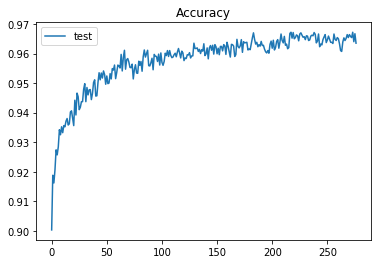

In [38]:
plt.plot(net.test_accuracy_history, label='test')
plt.title('Accuracy')
plt.legend();

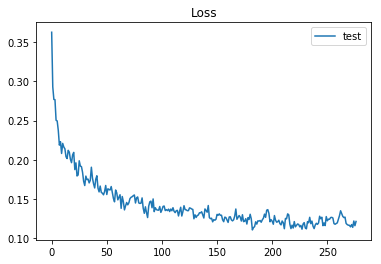

In [39]:
plt.plot(net.test_loss_history, label='test')
plt.title('Loss')
plt.legend()